In [1]:
import sys
# See which Python it's running
sys.executable

'/usr/local/Cellar/python/3.7.4_1/bin/python3.7'

In [3]:
# See where it's looking for imports
sys.path

['/Users/kibanez/git/STR_detection_python3',
 '/Users/kibanez/git/STR_detection_python3/venv/lib/python37.zip',
 '/Users/kibanez/git/STR_detection_python3/venv/lib/python3.7',
 '/Users/kibanez/git/STR_detection_python3/venv/lib/python3.7/lib-dynload',
 '/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '',
 '/Users/kibanez/git/STR_detection_python3/venv/lib/python3.7/site-packages',
 '/Users/kibanez/git/STR_detection_python3/venv/lib/python3.7/site-packages/IPython/extensions',
 '/Users/kibanez/.ipython']

In [10]:
import itertools
import numpy as np
import scipy
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
%matplotlib inline

In [11]:
import json
import os

In [12]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 16

Load data

In [13]:
repeat_sizes = pd.read_csv('/Users/kibanez/Documents/STRs/VALIDATION/table_validation_simple_withMaxAllele.tsv', sep='\t')
repeat_sizes.head()

,loci,VALIDATIONSET.ID,read.length,EH_a1,EH_a2,max_EH_allele
0,AR,VALIDATIONSET_1,150,44,57.0,57.0
1,AR,VALIDATIONSET_2,150,40,40.0,40.0
2,AR,VALIDATIONSET_3,150,55,62.0,62.0
3,AR,VALIDATIONSET_4,150,42,44.0,44.0
4,AR,VALIDATIONSET_5,150,24,NaN,NaN


Prepare data for plotting

In [14]:
repeat_info = {
    'AR':      {'expected_range': [34*3, 38*3],   'unit_len': 3, 'index': 12},
    'ATN1':    {'expected_range': [46*3, 48*3],   'unit_len': 3, 'index': 11},
    'ATXN1':   {'expected_range': [39*3, 44*3],   'unit_len': 3, 'index': 10},
    'ATXN2':   {'expected_range': [32*3, 33*3],   'unit_len': 3, 'index': 9},    
    'ATXN3':   {'expected_range': [45*3, 60*3],   'unit_len': 3, 'index': 8},    
    'ATXN7':   {'expected_range': [34*3, 36*3],   'unit_len': 3, 'index': 7},    
    'CACNA1A':   {'expected_range': [18*3, 20*3],   'unit_len': 3, 'index': 6},    
    'C9orf72':   {'expected_range': [60*6, 60*6],   'unit_len': 6, 'index': 5},        
    'FXN':     {'expected_range': [44*3, 66*3],   'unit_len': 3, 'index': 4},
    'HTT':     {'expected_range': [36*3, 40*3],   'unit_len': 3, 'index': 3},
    'TBP':    {'expected_range': [44*3, 49*3],   'unit_len': 3, 'index': 2},
    'FMR1':    {'expected_range': [55*3, 200*3],  'unit_len': 3, 'index': 1},
    'PPP2R2B':    {'expected_range': [32*3, 51*3],   'unit_len': 3, 'index': 0}    
}

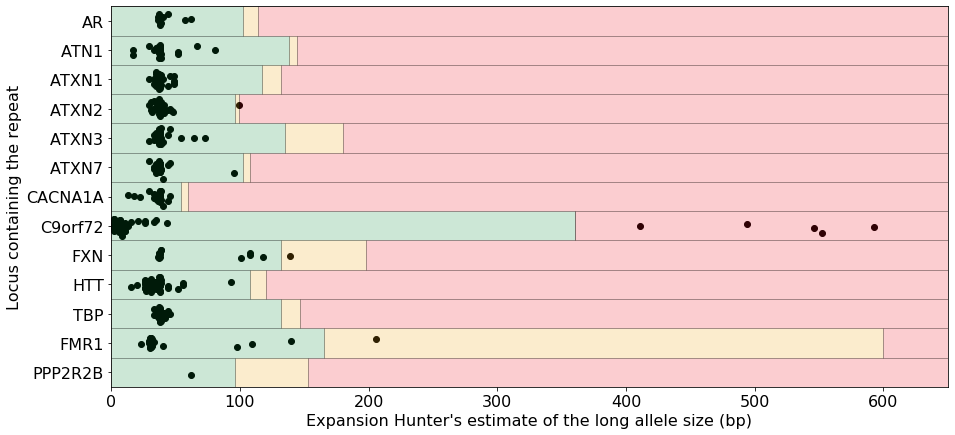

In [15]:
max_repeat_size = 650

fig, ax = plt.subplots(figsize=(15, 7))

for repeat_id, rec in repeat_sizes.groupby(by='loci'):
    normal_cutoff, premutation_cutoff = repeat_info[repeat_id]['expected_range']
    base_y = repeat_info[repeat_id]['index']
    
    ax.add_patch(patches.Rectangle((0, base_y - 0.5),
                                   normal_cutoff, 1.0,
                                   facecolor='#048732', alpha=0.2, ec='k'))
    
    ax.add_patch(patches.Rectangle((normal_cutoff, base_y - 0.5),
                                   premutation_cutoff - normal_cutoff,
                                   1.0, facecolor='#eda407', alpha=0.2, ec='k'))

    ax.add_patch(patches.Rectangle((premutation_cutoff, base_y - 0.5),
                                   max_repeat_size - premutation_cutoff,
                                   1.0, facecolor='#ed0716', alpha=0.2, ec='k'))

    
    allele_sizes = list(rec.max_EH_allele)
    ys = np.random.normal(base_y, 0.12, len(allele_sizes))
    ax.scatter(allele_sizes, ys, c='black')
    
    
    gene_names = [(gene, rec['index']) for gene, rec in repeat_info.items()]
    gene_names = sorted(gene_names, key=lambda k: k[1])
    gene_names = [g for g, _ in gene_names]
    ax.yaxis.set_ticks(range(0, len(gene_names)))
    ax.yaxis.set_ticklabels(gene_names)
    ax.margins(x=0, y=0)
    ax.set(xlabel='Expansion Hunter\'s estimate of the long allele size (bp)', ylabel='Locus containing the repeat');

In [16]:
# Let's save the plot into a PDF file
fig.savefig("/Users/kibanez/Documents/STRs/GEL_Conference_Autumn2019/figures/repeat-sizes_maxEHallele_average.pdf", bbox_inches='tight')

In [17]:
# Let's save the plot into a high quality PNG file
fig.savefig("/Users/kibanez/Documents/STRs/GEL_Conference_Autumn2019/figures/repeat-sizes_maxEHallele_average.png", bbox_inches='tight', dpi=600)